---
## Multiple linear regression <br> <font size=3.4> Dataset:50_Startups.csv<br><font size=2>Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.<br>R&D Spend -- Research and devolop spend in the past few years<br> Administration -- spend on administration in the past few years<br>Marketing Spend -- spend on Marketing in the past few years<br>State -- states from which data is collected<br>Profit -- profit of each state in the past few years<br>
---

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import pandas.util.testing as tm

C:\Users\mruna\AppData\Local\Temp\ipykernel_26304\3984696301.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df= pd.read_csv('50_Startups.csv')

In [3]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
df.info() #no-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df['State'].value_counts() #Checking the categories of State variable

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
#Getting dummy variables
df1= pd.get_dummies(df,columns=['State'])

In [7]:
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [8]:
df1.columns #renaming the columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [9]:
df1 = df1.rename({'R&D Spend':'rnd', 'Administration':'admin', 'Marketing Spend':'ms', 'Profit':'p',
       'State_California':'ca', 'State_Florida':'fl', 'State_New York':'ny'},axis=1)

In [10]:
df1.columns

Index(['rnd', 'admin', 'ms', 'p', 'ca', 'fl', 'ny'], dtype='object')

In [11]:
df1[df1.duplicated()].shape #checking for duplicates

(0, 7)

In [12]:
df1.corr() #Correlation of profit with admin is very less

,rnd,admin,ms,p,ca,fl,ny
rnd,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
ms,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
p,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
ca,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
fl,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
ny,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


### Building the regression model

In [13]:
model1 = smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df1).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.34e-27
Time:                        20:10:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
rnd            0.8060      0.046     17.369      0.000       0.712       0.900
admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
ms             0.0270      0.017      1.574      0.123      -0.008       0.062
ca          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
fl          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
ny          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.31e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### As per model 1, admin and ms are not significant, hence checking individually 

In [15]:
model1a = smf.ols('p~admin',data=df1).fit()

In [16]:
model1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 16 Feb 2023   Prob (F-statistic):              0.162
Time:                        20:10:36   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As per model 1a, admin is not significant.

In [17]:
model1b = smf.ols('p~ms',data=df1).fit()

In [18]:
model1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        20:10:41   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
ms             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As per model 1b, ms is signoficant,  Proceeding for model deletion dignostics now

## Cook's distance

### Iteration -1

In [19]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

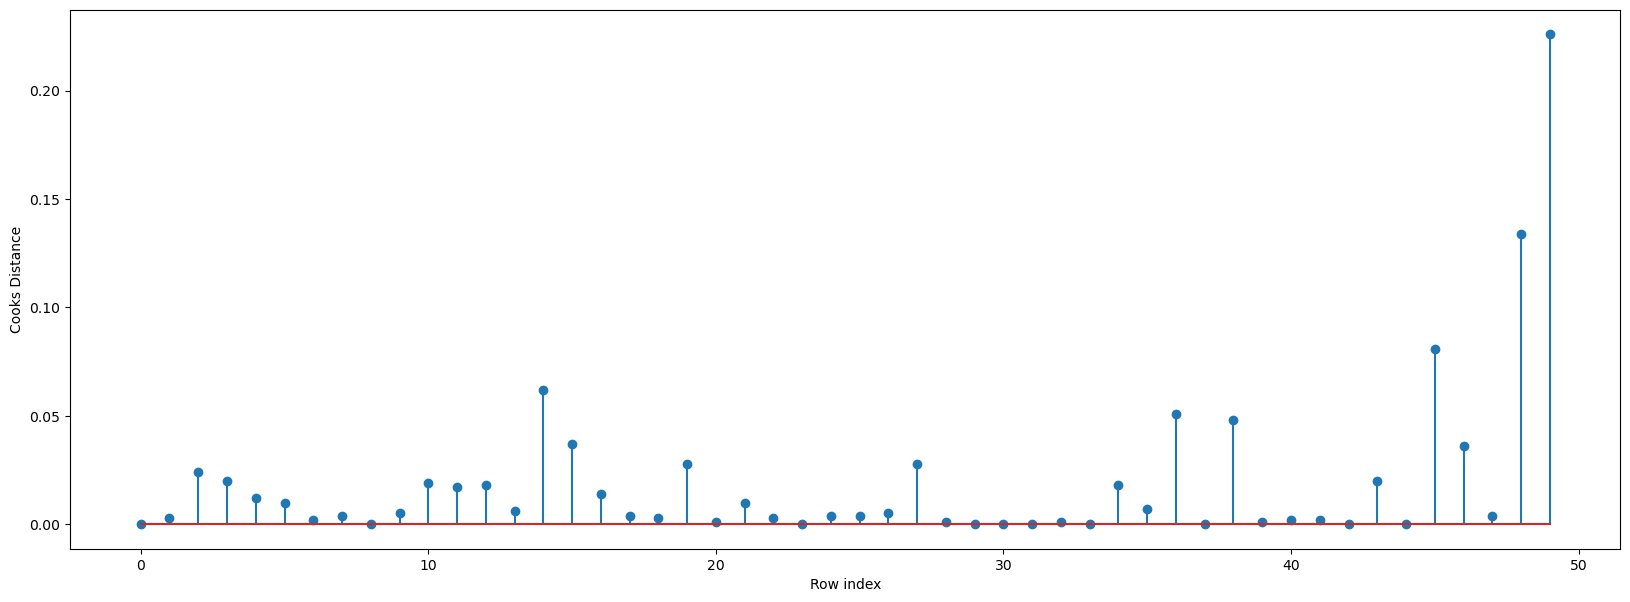

In [20]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
np.argmax(c),np.max(c)

(49, 0.2262509450150931)

In [22]:
df2 = df1.drop([49],axis=0).reset_index()

In [23]:
df2 = df2.drop(['index'],axis=1)

In [24]:
model2 = smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df2).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.51e-29
Time:                        20:10:50   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
rnd            0.7836      0.039     20.056      0.000       0.705       0.862
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
ca          1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
fl          1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
ny          1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     4.09e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Rsquared value has increased, ms and admin are still insignificant

### Iteration 2

In [26]:
model_influence = model2.get_influence()
(c1, _) = model_influence.cooks_distance

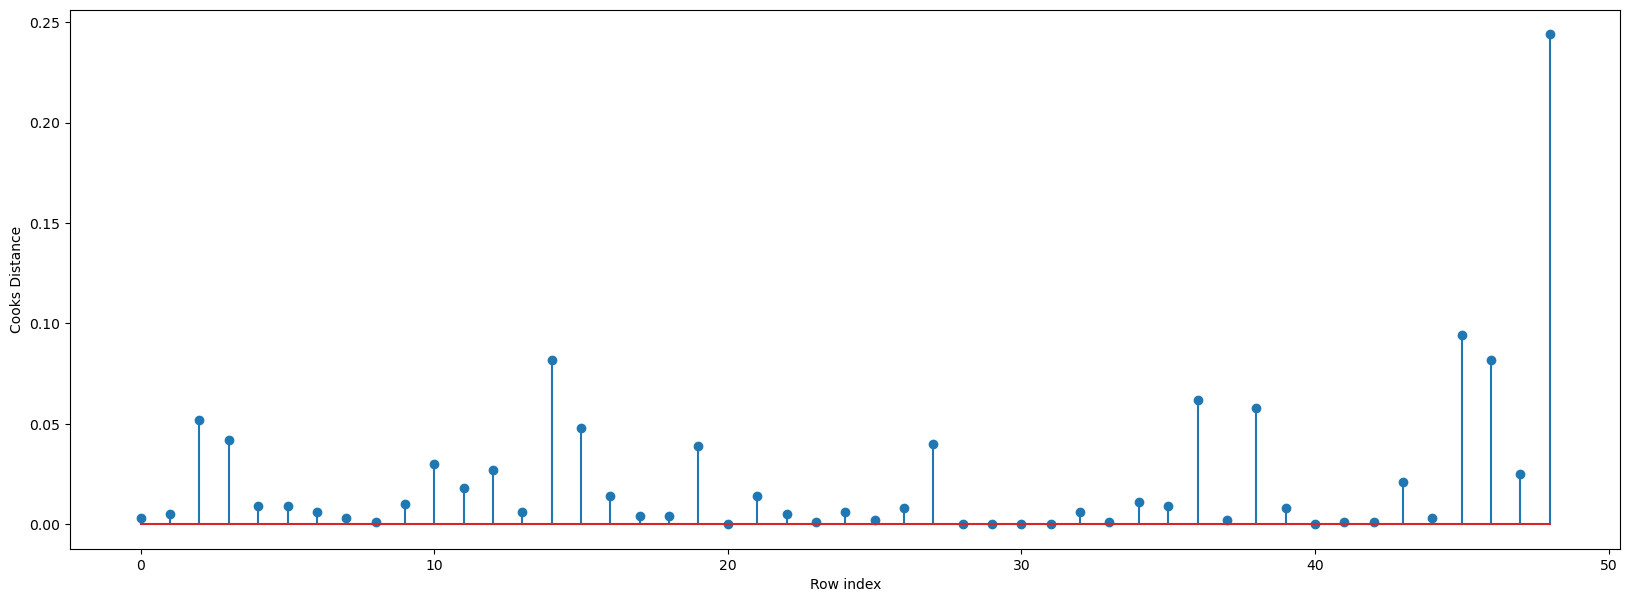

In [27]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
np.argmax(c1),np.max(c1)

(48, 0.24352817571403906)

In [29]:
df3 = df2.drop([48],axis=0).reset_index()

In [30]:
df3 = df3.drop(['index'],axis=1)

In [31]:
model3= smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df3).fit()

In [32]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           7.02e-29
Time:                        20:10:56   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.409e+04   4569.825      9.648      0.000    3.49e+04    5.33e+04
rnd            0.7888      0.037     21.160      0.000       0.714       0.864
admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
ms             0.0179      0.014      1.275      0.209      -0.010       0.046
ca           1.53e+04   2035.915      7.516      0.000    1.12e+04    1.94e+04
fl          1.415e+04   2261.128      6.259      0.000    9588.163    1.87e+04
ny          1.464e+04   2223.793      6.581      0.000    1.01e+04    1.91e+04
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.27e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Rsquared value has increased, ms and admin are still insignificant

### Iteration 3

In [33]:
model_influence = model3.get_influence()
(c2, _) = model_influence.cooks_distance

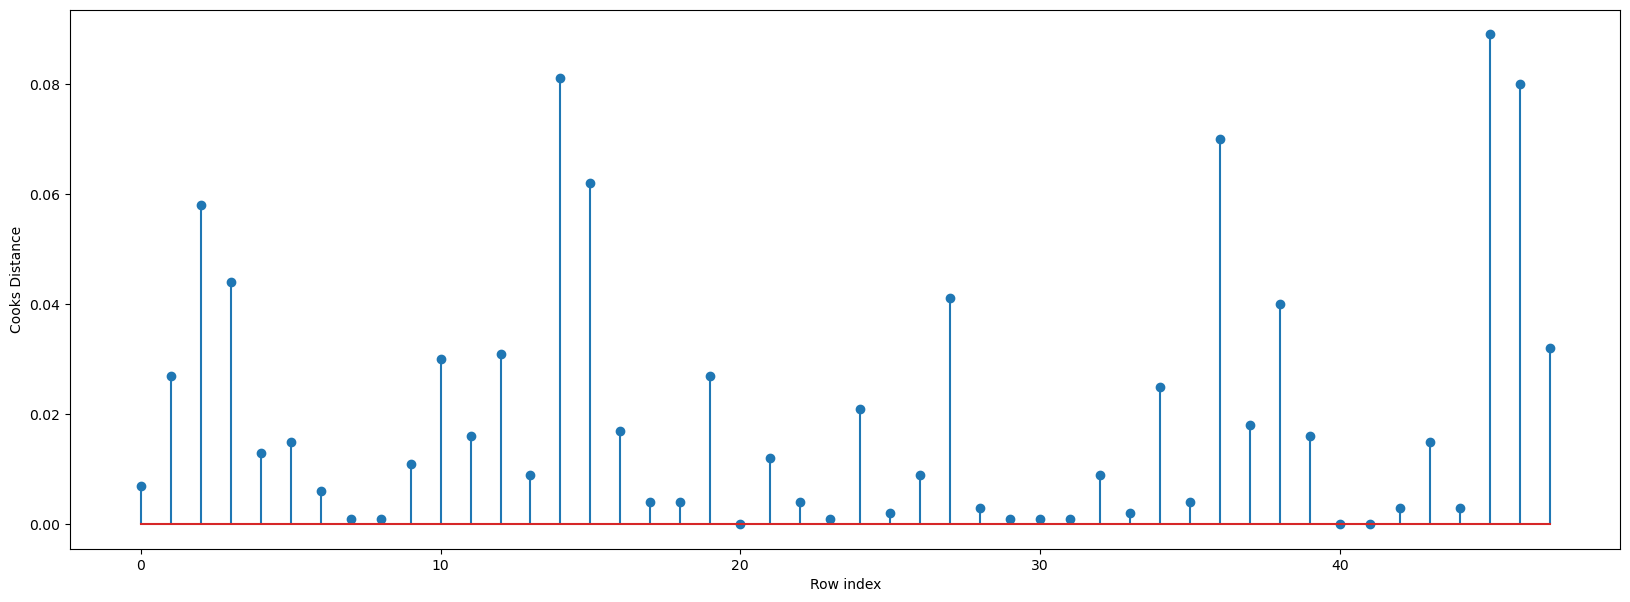

In [34]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

### Since cook's distance of most of the points seems to lie in the same range, hence we can conculde that there are no more influence points.

In [35]:
#Checking VIF value to see if there's some collinearity in the variables

rsq_rnd = smf.ols("rnd~admin+ms", data= df3).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)

rsq_adm = smf.ols("admin~rnd+ms", data=df3).fit().rsquared
ViF_adm = 1/(1-rsq_adm)

rsq_mar = smf.ols("ms~admin+rnd", data= df3).fit().rsquared
ViF_mar = 1/(1-rsq_mar)

d1 = {'Variables':['rnd','admin','ms'],'VIF':[ViF_rnd,ViF_adm,ViF_mar]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rnd,2.250972
1,admin,1.196016
2,ms,2.229867


### Since all VIFs are below 10, hence there's no interdependency among the variables

eval_env: 1


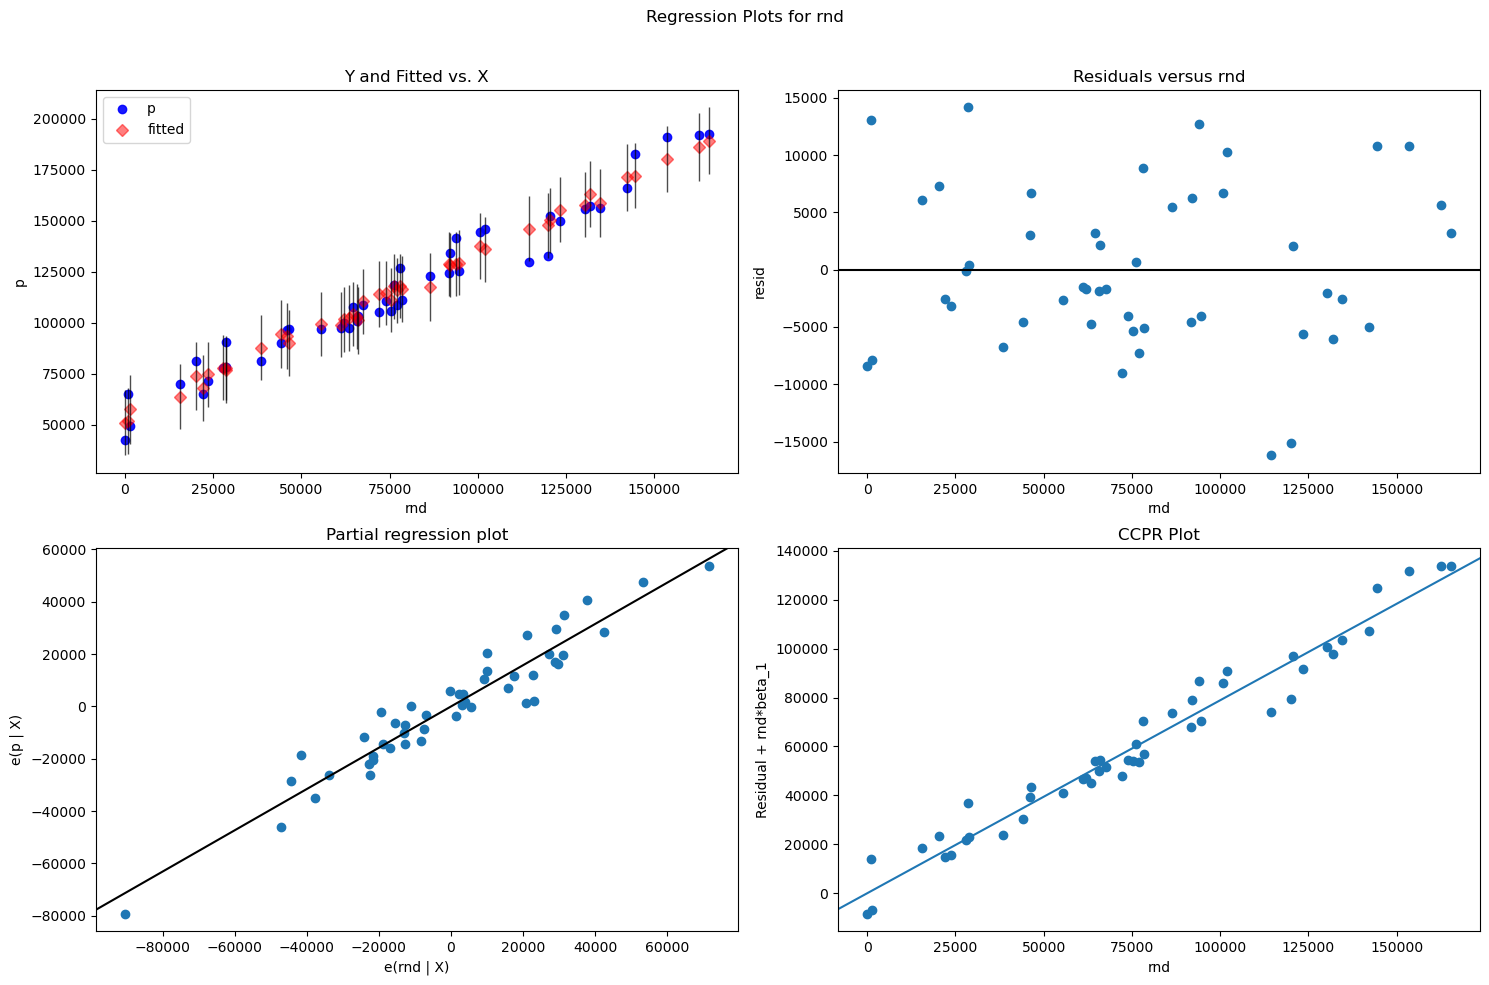

In [36]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model3, "rnd", fig=fig)
plt.show()

eval_env: 1


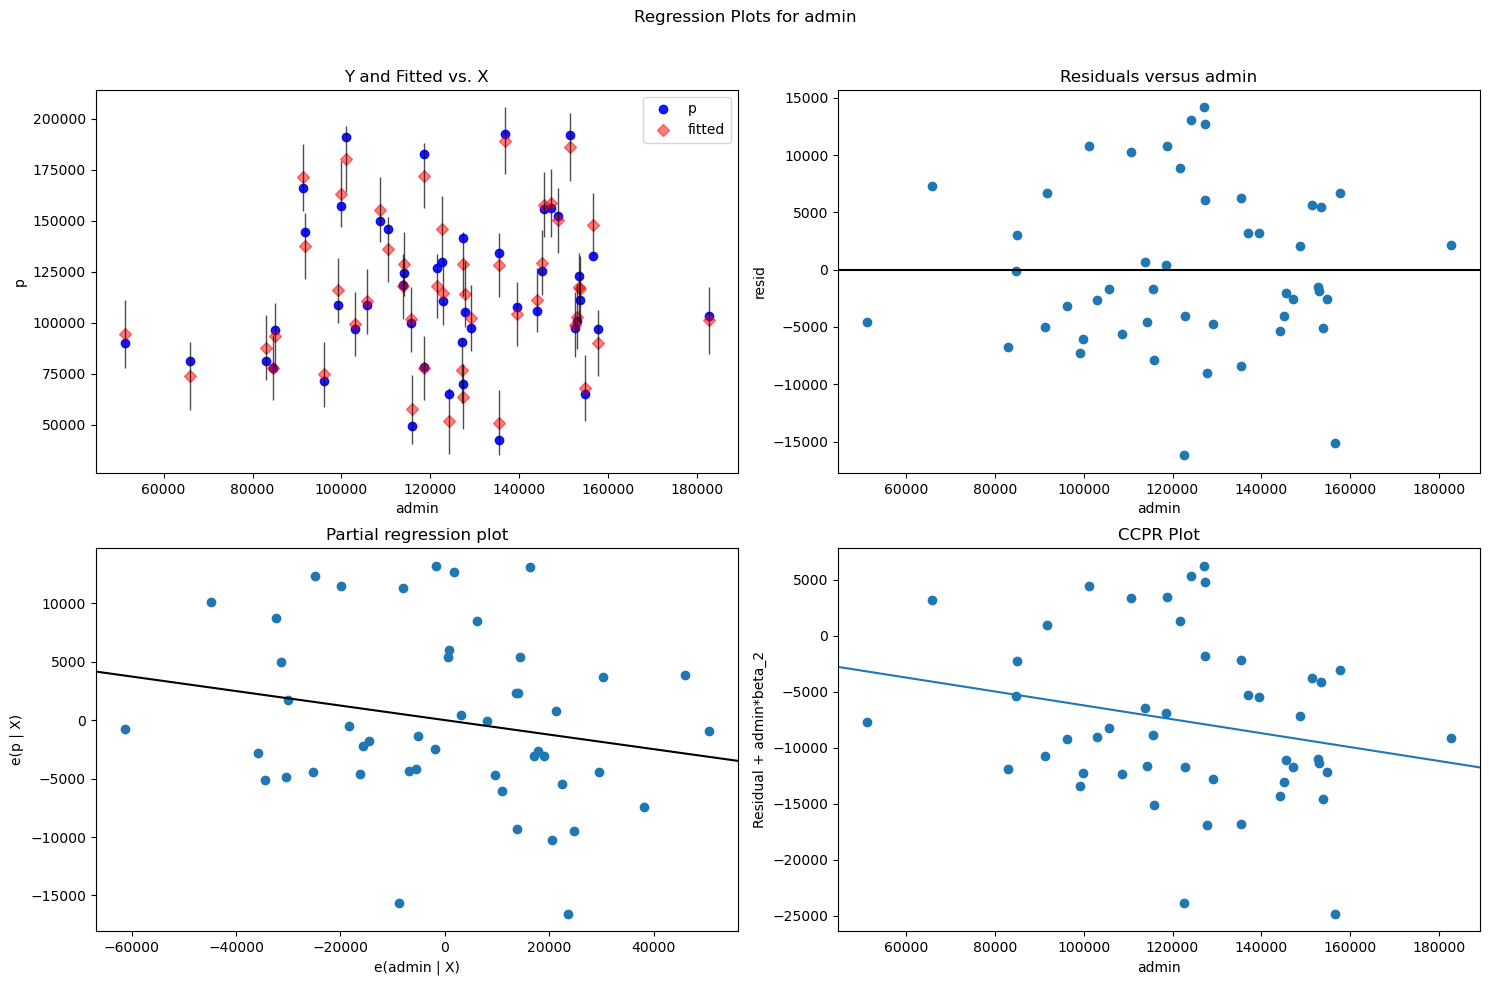

In [37]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model3, "admin", fig=fig)
plt.show()

eval_env: 1


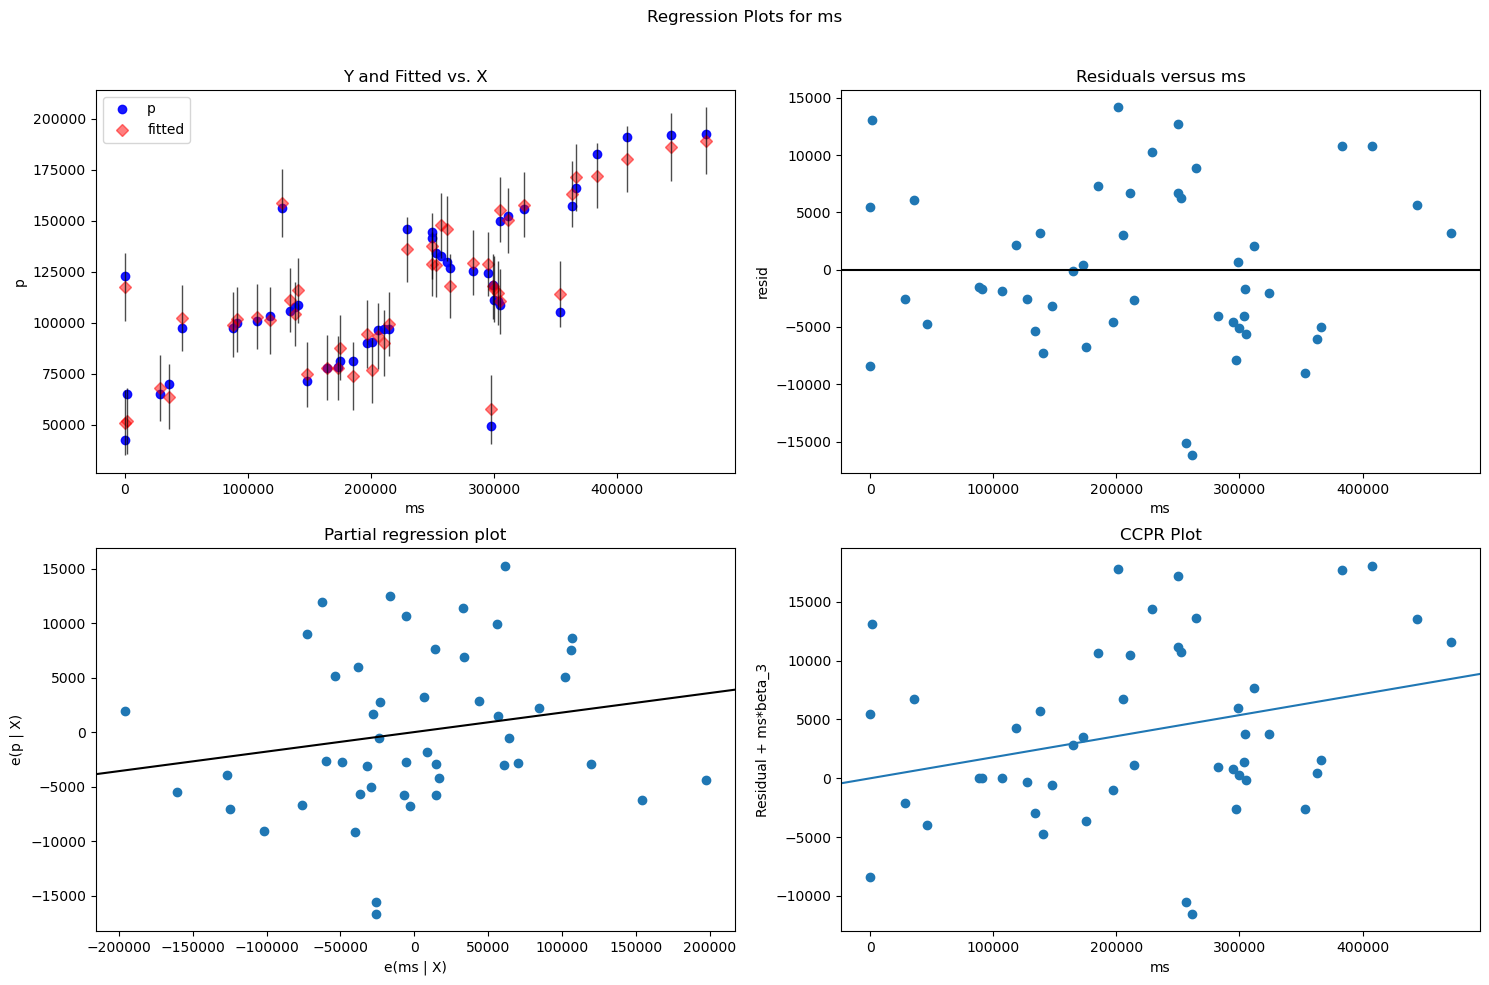

In [38]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model3, "ms", fig=fig)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


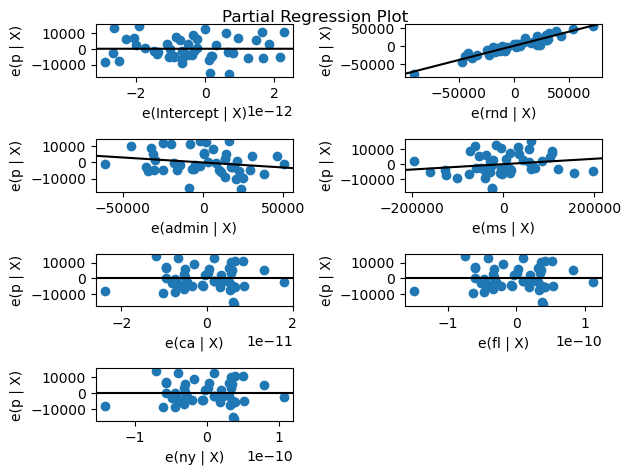

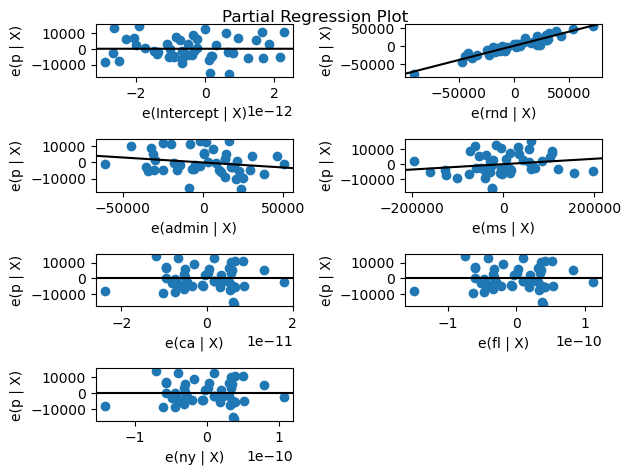

In [39]:
sm.graphics.plot_partregress_grid(model3)

### Since the correlation of admin with profit is less, and also as per the p-value, it's insignificant, hence we can drop the admin variable

In [40]:
final_model= smf.ols('p~rnd+ms+ca+fl+ny',data=df3).fit()

In [41]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.02e-29
Time:                        20:11:08   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.83e+04   1841.077     20.803      0.000    3.46e+04     4.2e+04
rnd            0.7692      0.035     22.072      0.000       0.699       0.840
ms             0.0251      0.013      1.908      0.063      -0.001       0.052
ca          1.353e+04   1599.496      8.461      0.000    1.03e+04    1.68e+04
fl          1.216e+04   1761.727      6.904      0.000    8609.549    1.57e+04
ny           1.26e+04   1685.592      7.478      0.000    9204.975     1.6e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.41e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Test for Normality of Residuals (Q-Q Plot)

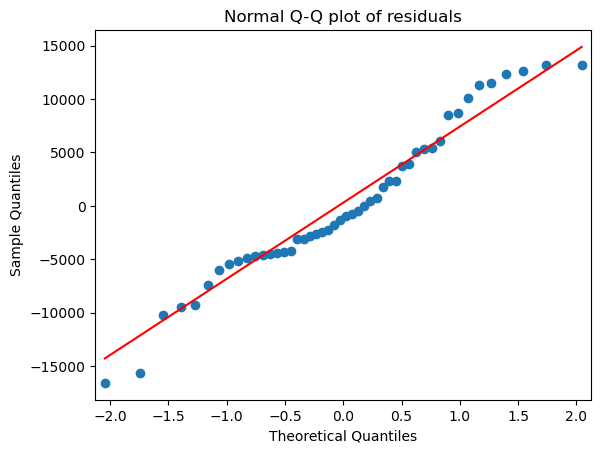

In [42]:
qqplot=sm.qqplot(final_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()